# Intro to Logistic Regression - our first Classifier 

## Objectives 
* Understand differences between regression and classification 
* Interpret the sigmoid function 
* Use SKlearn to train and fit a logistic regression model 
* Be able to explain differences in classification metrics 
* Deal with unbalanced data 

![](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/machine-learning1.png?SnePeroHk5B9yZaLY7peFkULrfW8Gtaf&itok=yjEJbEKD)

## What is Logistic Regression? 

![](https://miro.medium.com/max/400/1*zLfpo6F_Bfi6uvRL6iLX_Q.jpeg)
It belongs to a class of predictive models called _Generalized Linear Models_. All of these models have 2 things in common: They all define significant relationships between independent/dependent variables and they indicate the strength of the relationships. 

Different from Linear regression -- it can predict the probabilities associated with a success or a failure. 
* Is this email likely spam? <br/>
* What is the probability that this citizen will vote Republican? <br/>
* Is this homeowner likely to default on their mortgage? <br/>
* Is this person likely to buy our product? <br/>
* Is this tumor likely to be cancerous or benign?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

# For demonstrative pruposes
#from scipy.special import logit, expit

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 22 to 164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ri          214 non-null    float64
 1   na          214 non-null    float64
 2   mg          214 non-null    float64
 3   al          214 non-null    float64
 4   si          214 non-null    float64
 5   k           214 non-null    float64
 6   ca          214 non-null    float64
 7   ba          214 non-null    float64
 8   fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [3]:
# glass identification dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [6]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


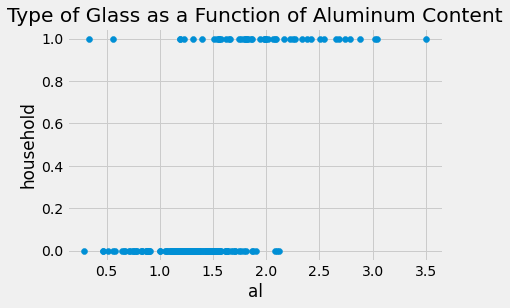

In [7]:
fig, ax = plt.subplots()
ax.scatter(glass.al, glass.household)
ax.set_xlabel('al')
ax.set_ylabel('household')
ax.set_title('Type of Glass as a Function of Aluminum Content');

### If we try to fit a regressor to this data...

In [8]:
# fit a linear regression model and store the predictions

linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

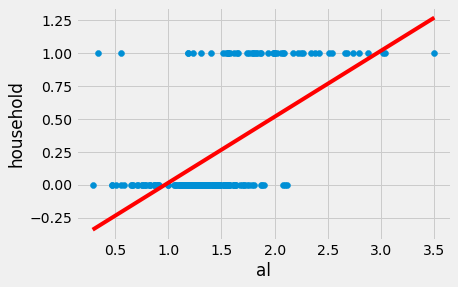

In [9]:
# scatter plot that includes the regression line

fig, ax = plt.subplots()
ax.scatter(glass.al, glass.household)
ax.plot(glass.al, glass.household_pred, color='red')
ax.set_xlabel('al')
ax.set_ylabel('household');

### Interpreting Our Predictions
If **al=3**, what class do we predict for household?

If **al=1.5**, what class do we predict for household?

We predict the 0 class for **lower values of al**, and the 1 class for **higher values of al**. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

## Logistic Regression - explained 
Logistic regression can do what we just did.

![](https://miro.medium.com/max/571/0*tGVPGu3aa1rhTdfl.png)

The strategy now is to generalize the notion of linear regression; linear regression as we've known it will become a special case. In particular, we'll keep the idea of the regression best-fit line, but now we'll allow the model to make predictions through some (non-trivial) transformation of the linear predictor.

Let's say we've constructed our best-fit line, i.e. our linear predictor, $\hat{L} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

Consider the following transformation:
$\large\hat{y} = \Large\frac{1}{1 + e^{-\hat{L}}} \large= \Large\frac{1}{1 + e^{-(\beta_0 + ... + \beta_nx_n)}}$. This is called the sigmoid function.

We're imagining that $\hat{L}$ can take any values between $-\infty$ and $\infty$.

$\large\rightarrow$ But what values can $\hat{y}$ take? What does this function even look like?

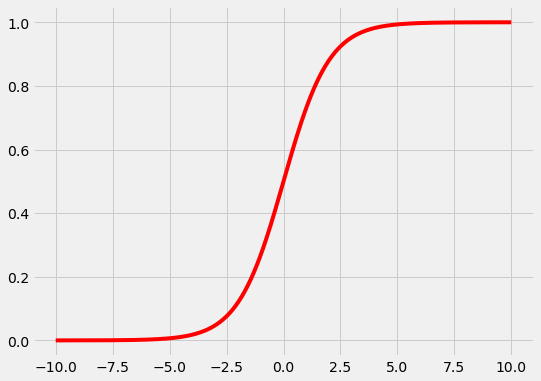

In [10]:
# Let's plot this function here:

X = np.linspace(-10, 10, 300)
Y = 1 / (1 + np.exp(-X))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, 'r');

## More Interpretation
This function squeezes our predictions between 0 and 1. And that's why it's so useful for binary classification problems.

Suppose I'm building a model to predict whether a plant is poisonous or not, based perhaps on certain biological features of its leaves. I'll let '1' indicate a poisonous plant and '0' indicate a non-poisonous plant.

Now I'm forcing my predictions to be between 0 and 1, so suppose for test plant $P$ I get some value like 0.19.

I can naturally understand this as the probability that $P$ is poisonous.

If I truly want a binary prediction, I can simply round my score appropriately.

## Fitting Logistic Regression
### sklearn.linear_model.LogisticRegression()
In general, we should always scale our data when using this class. Scaling is always important for models that include regularization, and scikit-learn's LogisticRegression() objects have regularization by default.

Here we've forgone the scaling since we only have a single predictor.

In [11]:
# fit a logistic regression model and store the class predictions

logreg = LogisticRegression(random_state=42)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

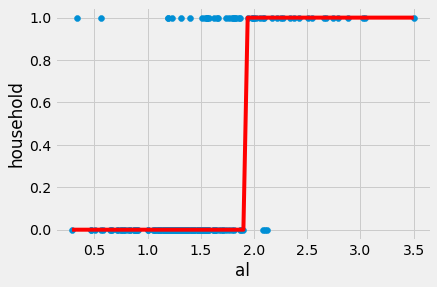

In [12]:
# plot the class predictions

fig, ax = plt.subplots()
ax.scatter(glass.al, glass.household)
ax.plot(glass.al, glass.household_pred_class, color='red')
ax.set_xlabel('al')
ax.set_ylabel('household');


### .predict() vs. .predict_proba()
Let's checkout some specific examples to make predictions with. We'll use both predict() and predict_proba().

In [13]:
glass.al

id
22     0.29
185    0.34
40     0.47
39     0.47
51     0.51
       ... 
193    2.79
210    2.88
173    3.02
172    3.04
164    3.50
Name: al, Length: 214, dtype: float64

In [14]:
# examine some example predictions

print(logreg.predict(glass['al'][22].reshape(1, -1)))
print(logreg.predict(glass['al'][185].reshape(1, -1)))
print(logreg.predict(glass['al'][164].reshape(1, -1)))
print('\n')
print(logreg.predict_proba(glass['al'][22].reshape(1, -1))[0])
print(logreg.predict_proba(glass['al'][185].reshape(1, -1))[0])
print(logreg.predict_proba(glass['al'][164].reshape(1, -1))[0])
first_row = glass['al'][22].reshape(1, -1)

[0]
[0]
[1]


[0.9939759 0.0060241]
[0.99296771 0.00703229]
[0.00743731 0.99256269]


## Let's walk thru a more complete example 

In [15]:
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
#what's our dependent variable? 
salary_map = {' <=50K':1, ' >50K':0}
df['salary'] = df['salary'].map(salary_map).astype(int)

<AxesSubplot:xlabel='salary', ylabel='count'>

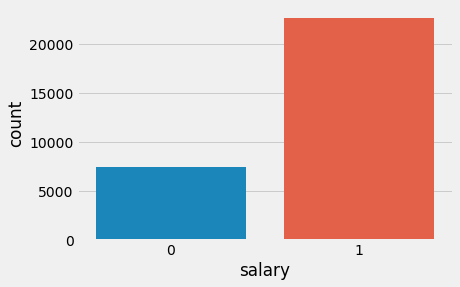

In [19]:
#let's look at a countplot to visualize our new dependent variable 
sns.countplot(x='salary', data=df)

**How could we adjust this countplot to visualize the relationship between sex and salary?**

/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

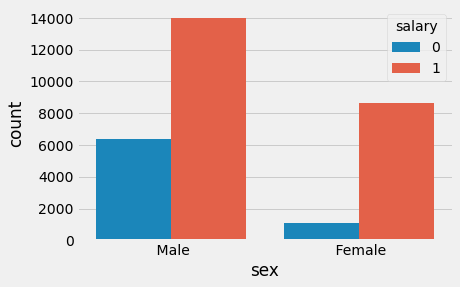

In [20]:
#code here 
sns.countplot(df['sex'], hue=df['salary'])

**Now let's dummy our objects, split our data into a features and target and split into training/testing sets**

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 97 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    30162 non-null  int64
 1   fnlwgt                                 30162 non-null  int64
 2   education-num                          30162 non-null  int64
 3   capital-gain                           30162 non-null  int64
 4   capital-loss                           30162 non-null  int64
 5   hours-per-week                         30162 non-null  int64
 6   salary                                 30162 non-null  int64
 7   workclass_ Local-gov                   30162 non-null  uint8
 8   workclass_ Private                     30162 non-null  uint8
 9   workclass_ Self-emp-inc                30162 non-null  uint8
 10  workclass_ Self-emp-not-inc            30162 non-null  uint8
 11  workclass_ State-gov        

In [23]:
X = df.drop(['salary'], axis=1)
y = df['salary']

split_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=0)

In [24]:
print(y.value_counts())

1    22654
0     7508
Name: salary, dtype: int64


In [25]:
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (21113, 96)(21113,)
Test dataset: (9049, 96)(9049,)


In [26]:
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [27]:
#predictions
prediction = logmodel.predict(X_test)

## Classification Metrics - lots of options 

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))


----------------------------------------
Accuracy Score:
0.7848381036578628
----------------------------------------
Confusion Matrix:
[[ 581 1704]
 [ 243 6521]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.71      0.25      0.37      2285
           1       0.79      0.96      0.87      6764

    accuracy                           0.78      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.78      0.74      9049



## Evaluating Classification Models 

For classification problems, the target is a categorical variable. This means that we can simply count the number of times that our model predicts the correct category and the number of times that it predicts something else.

We can visualize this by means of a **confusion matrix**, a tabular representation of Actual vs Predicted values.
![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

**The metrics for evaluating your models performance can be drawn from this matrix** 

* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

* Recall = $\frac{TP}{TP + FN}$

* Precision = $\frac{TP}{TP + FP}$

* F-1 Score = $\frac{2PrRc}{Pr + Rc}$ = $\frac{2TP}{2TP + FP + FN}$ 

**General Lessons**: 
First, let's make some general observations about the metrics we've so far defined.

**Accuracy:**

   * **Pro:** Takes into account both false positives and false negatives.

   * **Con:** Can be misleadingly high when there is a significant class imbalance. (A lottery-ticket predictor that always predicts a loser will be highly accurate.)

**Recall:**

   * **Pro:** Highly sensitive to false negatives.

   * **Con:** No sensitivity to false positives.

**Precision:**

   * **Pro:** Highly sensitive to false positives.

   * **Con:** No sensitivity to false negatives.
    




## Practice: 

1. We are working with a dataset that is predicting disease. Consider a population with 1200 people. 5%(60 ppl) of the population has the disease. Discuss and try to answer the following questions using the formulas for precision/recall.  <br/>

    a. What is the positive and negative class? <br/>
    b. What would a recall of 80% mean? What type of error is this? <br/>
    c. What would a precision of 80% mean? What type of error is this?
 
 
2. We are working with an algorithm that predicts whether someone will pay back a loan or not. Out of 1000 people, 60% will pay back the loan(TP-600).<br/>

    a. What is the positive class? <br/>
    b. What would a recall of 75% mean? <br/>
    c. What would a precision of 85% mean? <br/>
    d. What’s more important, precision or recall? 


## A couple More Metrics 
**F-1 Score:**

Harmonic mean of recall and precision.

**AIC (Akaike Information Criteria**) — The analogous metric of adjusted R² in logistic regression is AIC. AIC is the measure of fit which penalizes model for the number of model coefficients. Therefore, we always prefer model with minimum AIC value.

**ROC Curve:** Receiver Operating Characteristic (ROC) summarizes the model’s performance by evaluating the trade-offs between true positive rate (sensitivity) and false positive rate (1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy (A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model. Below is a sample ROC curve. The ROC of a perfect predictive model has TP equals 1 and FP equals 0. This curve will touch the top left corner of the graph.
![](https://miro.medium.com/max/300/0*20UWoOC5Gi4SdbAw.jpg)

### Back to our Model

## We have an imbalance problem...

In [ ]:
#smote
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
logmodel2 = LogisticRegression(C=100, solver='liblinear')
logmodel2.fit(X_train_resampled, y_train_resampled)

In [ ]:
prediction2 = logmodel2.predict(X_test)

In [ ]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction2))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction2))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction2))

## Hyperparameter Tuning 
#### Just a quick intro - we'll get into this much more tomorrow 

#### LogisticRegression has several optional parameters that define the behavior of the model and approach: 

**penalty**- is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

**dual**- is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

**tol**- is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

**C**- is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

**fit_intercept**- is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

**intercept_scaling**- is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

**class_weight**- is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

**random_state**- is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

**solver**- is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

**max_iter**- is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

**multi_class**- is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

**verbose**- is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

**warm_start**- is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

**n_jobs**- is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

**l1_ratio**- is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

#### Warning: 
**You should carefully match the solver and regularization method for several reasons:**

'liblinear' solver doesn’t work without regularization. <br/>
'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization. <br/>
'saga' is the only solver that supports elastic-net regularization.

### Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- Not many parameters to tune
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions